# Support Vector Machines

## Linear Binary SVM

This is the simplest form of an SVM. This model takes in data and targets with shapes `(n,f)` and `(n,)`. The support vectors, which we call "weights", have shape `(f,)` and the bias term is a scalar that we embedded into the data itself (see `generate_data()`). The SVM categorizes data based on the following criterion:

`prediction = data.dot(weights) >= 0`

Note that since weights has shape `(3,)` and data has shape `(10,3)`, the prediction output has 
shape `(10,)`. This implementation of an SVM has a hard margin

Linear Binary SVM with Soft Margin
Hyperparameters:
- Iterations: 1000
- lr 0.01
- alpha 0.0

step 0 loss 0.61 width 5.29 score 0.86
step 100 loss 0.04 width 2.09 score 1.0
step 200 loss 0.01 width 1.83 score 1.0
step 300 loss 0.0 width 1.7 score 1.0
step 400 loss 0.0 width 1.65 score 1.0
step 500 loss 0.0 width 1.61 score 1.0
step 600 loss 0.0 width 1.58 score 1.0
step 700 loss 0.0 width 1.58 score 1.0
step 800 loss 0.0 width 1.58 score 1.0
step 900 loss 0.0 width 1.58 score 1.0


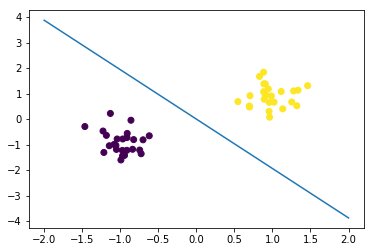

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import load_iris
%matplotlib inline

"""
Linear Binary SVM Algorithm:

Hyperparamters:
lr - learning rate
iters - number of optimization steps
alpha - specifies "softness" of margin

Given data with shape (n,f) and targets with shape (n,)
1. Normalize data and preprocess targets to be -1 and 1
2. Add intercept term to data - data will now have shape (n,f+1)
3. Initialize weights randomly with shape (f+1)
3. For n_iterations do:
4.      compute loss = alpha * L2_norm(w)**2 + sum_i max(0,1-y_i*(w.T @ x_i))/n
5.      compute grad_loss = alpha * w + grad_rhs
        here, rhs = sum_i max(0,1-y_i*(w.T @ x_i))/n
              grad_rhs = 0 if rhs<0, and otherwise grad_rhs = sum_i y_i*x_i / n
              this is because rhs is not differentiable, so we need to take the sub-gradient
6.      update w with w = w - lr * grad_loss
7.      compute the score and log values
"""

def generate_data():
    (data,targets) =  make_blobs(n_samples=50,
                                 n_features=2,
                                 centers=2,
                                 cluster_std=1.2,
                                 random_state=np.random.randint(100))
    data = (data-data.mean(0))/(data.std(0)+1e-6)
    # add a column of 1s to data, which will be our bias in the SVM
    data = np.c_[np.ones((data.shape[0])),data]
    targets = [t if t>0 else -1 for t in targets]
    return data, targets


class LinearBinarySVM:

    def __init__(self,iters=10,lr=1e-3,alpha=0.01):
        self.iters = iters
        self.lr = lr
        self.alpha = alpha 
        self.weights = []
        self.log_interval = iters//10 if iters > 20 else 1
        
        
    def fit(self,data,targets):
        print(self)

        n = data.shape[0]
        features = data.shape[1]
        self.weights = np.random.randn(features)
        width = lambda w: 2/np.linalg.norm(w[1:])
        for i in range(self.iters):
            loss = self._loss(data,targets)
            self.weights-=self.lr*self._grad_loss(data,targets)
            if i % self.log_interval == 0:
                score = self.score(data,targets)
                print('step',i,'loss',round(loss,2),'width',round(width(self.weights),2),'score',score)

        self._plot_hyperplane(data,targets)
        
    def predict(self,data):
        w = self.weights
        
        vals = data @ self.weights
        y = [1 if t >=0 else -1 for t in vals]
        return y,vals
    
    def score(self,data,targets):
        y,_ = self.predict(data)
        return np.mean([t1-t2==0 for t1,t2 in zip(targets,y)])
    
    def _loss(self,data,targets):
        assert len(self.weights), "Please initialize weights before evaluating the loss."
        w = self.weights
        rhs = 1-targets*(data @ w)
        rhs[rhs<0]=0
        return self.alpha*np.linalg.norm(w)**2 + np.mean(rhs)
        
    def _grad_loss(self,data,targets):
        assert len(self.weights), "Please initialize weights before evaluating the grad_loss."
        w = self.weights
        f = data.shape[1]
        rhs = 1-targets*(data @ w)
        zero_idxs = np.argwhere(rhs<0).reshape(-1)
        grad_rhs = np.array([a*b for a,b in zip(data,targets)])
        grad_rhs[zero_idxs]=np.zeros(f)
        return 2*self.alpha*w - grad_rhs.mean(0)
    
    def _plot_hyperplane(self,data,targets):
        w = self.weights
        xx = np.linspace(-2.0, 2.0)
        yy = -(w[1]/ w[2])* xx 
        plt.plot(xx, yy)
        plt.scatter(data[:,1],data[:,2],c=targets)

    def __str__(self):
        print('='*40)
        print('Linear Binary SVM with Soft Margin')
        print('='*40)
        print('Hyperparameters:')
        print('- Iterations:',self.iters)
        print('- lr',self.lr)
        print('- alpha',self.alpha)
        print('='*40)
        return ""

    
data,targets = generate_data()         
model = LinearBinarySVM(iters=1000,lr=1e-2,alpha=.0)
model.fit(data,targets)